# Model
This notebook builds and compares several classification models based on the finalized dataframe. Five models are assessed:
- Logistic Regression
- Random Forrest
- SVM
- KNN
- Naive-Bayes  

To overcome severe class imbalance which is inherent to dataset, options such as SMOTE, weighting and threshold adjustment are used to improve model performance. Several figures showing model results are output.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('data/dataframe.pkl')

In [3]:
df.head()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate,close_elect
0,55504.0,1.7,20800.0,37.8,39721.0,54487.0,3.9,13.5,87.6,24.6,93.371913,0.762305,0.025512,0
1,212628.0,16.7,75149.0,42.3,41286.0,56460.0,4.0,11.7,90.0,29.5,133.746808,0.810999,0.040973,0
2,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,5.9,29.9,73.8,12.9,28.557545,0.491888,0.045390,0
3,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,4.4,20.1,80.7,12.0,36.409779,0.766278,0.022146,0
4,58013.0,1.2,20619.0,40.8,31470.0,47213.0,4.0,14.1,80.0,13.0,89.973324,0.949322,0.086808,0


In [4]:
# drop rows with nans

df = df.dropna()

In [5]:
# inspect mean values of features for not-close vs close outcomes

df.groupby('close_elect').mean()

,population,growth,households,median_age,per_cap_income,hh_income,unempl_rate,poverty_rate,hs_rate,college_rate,density,white_rate,hisp_rate
close_elect,,,,,,,,,,,,,
0,97754.622861,0.673854,35383.793292,41.180151,40647.942847,49173.193018,4.611328,15.914203,85.657392,20.269884,251.164202,0.838362,0.088684
1,213686.159236,2.568153,77334.891720,38.888535,42207.388535,53773.019108,4.530573,15.549045,88.495541,27.620382,317.779807,0.760183,0.095176


In [6]:
close = (df['close_elect'] == 1).sum()
not_close = (df['close_elect'] == 0).sum()

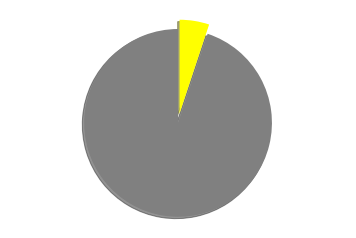

In [7]:
# plot pie chart

labels = ['Not Close', 'Close']
sizes = [not_close, close]
explode = (0, 0.1)

colors = ['grey','yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show();
# plt.savefig("presentation/pie.png");

In [8]:
# baseline, null model accuracy - guess '0' every time

(df['close_elect'] == 0).sum() / len(df)

0.9490094186424164

In [9]:
# initialize feature matrix and observed outcome

X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

## Model Preprocessing

In [10]:
# test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Without upsampling

In [11]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train_trans = scaler.transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_mod = X_train_trans
y_train_mod = y_train

X_test_mod = X_test_trans
y_test_mod = y_test

### With upsampling

In [14]:
# smote to increase underrepresented sampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [15]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_res)

# transform train data
X_train_trans = scaler.transform(X_res)
X_train_trans = pd.DataFrame(X_train_trans)

# transform test data
X_test_trans = scaler.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans)

# model input
X_train_smote = X_train_trans
y_train_smote = y_res

X_test_smote = X_test_trans
y_test_smote = y_test

In [16]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

## PCA
Examine data decomposed using PCA for any grouping trends in data.

Populating the interactive namespace from numpy and matplotlib


/home/kevcon/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['close', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


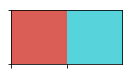

In [17]:
import seaborn as sns
%pylab inline

y_colors = sns.color_palette("hls", 2)
sns.palplot(y_colors)

In [18]:
from sklearn import decomposition

In [19]:
def plot_PCA_2D(data, target):

    pca = decomposition.PCA(n_components=2)
    pca.fit(data)
    pcafeatures = pca.transform(data)
    
    target_labels = ['Not Close', 'Close']
    
    #print(pca.components_)
    
    for i, label in enumerate(target_labels):
        plt.scatter(pcafeatures[target == i, 0], pcafeatures[target == i, 1],
                   c=y_colors[i], label=label, alpha=.75, edgecolors="none")
    xlabel("1st pricinple component", fontsize=18)
    ylabel("2nd pricinple component", fontsize=18)
    plt.title("PCA", fontsize=22)
    plt.xticks([])
    plt.yticks([])
    legend(fontsize=16)
    
#     plt.savefig("presentation/pca.png")

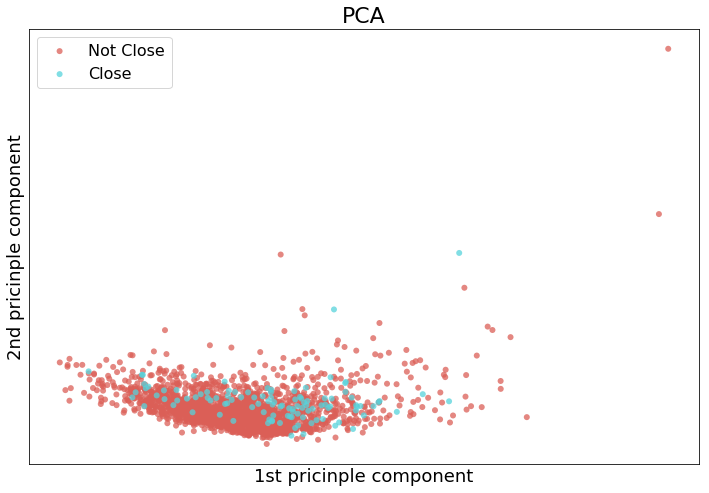

In [20]:
figsize(12,8)
plot_PCA_2D(X_train_mod, y_train_mod)

## Logistic Regression

### Initial Model

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_mod, y_train_mod)
y_pred = logreg.predict(X_test_mod)

In [22]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[876,   0],
       [ 48,   0]])

### Precision/Recall

In [24]:
y_prob_logreg = logreg.predict_proba(X_test_mod)[:,1]

In [25]:
# for plot

logreg_p, logreg_r, logreg_t = precision_recall_curve(y_test_mod, y_prob_logreg)

### Grid Search

In [26]:
# try parameter on best model
param_grid = {'C': np.logspace(-5, 5, 100)}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="recall")

In [27]:
best_model = grid_search.fit(X_train_mod, y_train_mod)

In [28]:
grid_search.best_params_

{'C': 0.3511191734215127}

In [29]:
logreg_grid = LogisticRegression(C=0.3511191734215127)
logreg_grid.fit(X_train_mod, y_train_mod)
y_pred = logreg_grid.predict(X_test_mod)

In [30]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Threshold Model

In [31]:
y_pred_proba = logreg_grid.predict_proba(X_test_mod)

In [32]:
y_pred = y_pred_proba >= 0.1

In [33]:
print(metrics.classification_report(y_test_mod, y_pred[:, 1]))

             precision    recall  f1-score   support

          0       0.96      0.89      0.93       876
          1       0.15      0.33      0.20        48

avg / total       0.92      0.86      0.89       924



In [34]:
metrics.confusion_matrix(y_test_mod, y_pred[:, 1])

array([[783,  93],
       [ 32,  16]])

### Weighted Model

In [35]:
logreg_wgt = LogisticRegression(C=0.3511191734215127, class_weight="balanced")
logreg_wgt.fit(X_train_mod, y_train_mod)
y_pred = logreg_wgt.predict(X_test_mod)

In [36]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.77      0.86       876
          1       0.14      0.69      0.23        48

avg / total       0.93      0.77      0.83       924



In [37]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[674, 202],
       [ 15,  33]])

In [38]:
y_prob_logreg_wgt = logreg_wgt.predict_proba(X_test_mod)[:,1]

In [39]:
logreg_wgt_p, logreg_wgt_r, logreg_wgt_t = precision_recall_curve(y_test_mod, y_prob_logreg_wgt)

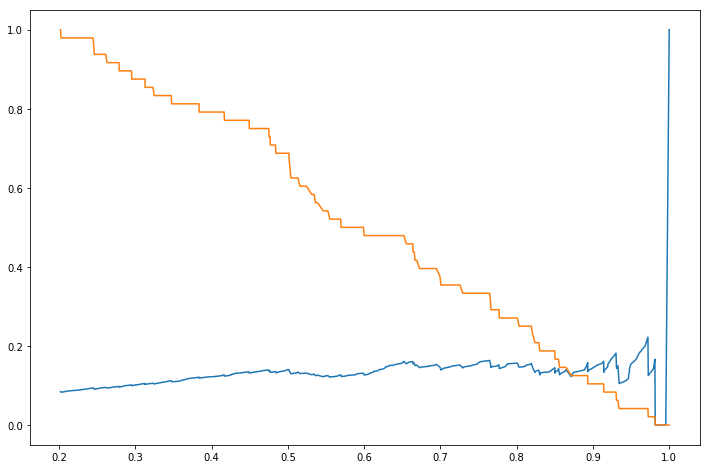

In [40]:
plt.plot(np.append(logreg_wgt_t, 1), logreg_wgt_p)
plt.plot(np.append(logreg_wgt_t, 1), logreg_wgt_r);

In [41]:
y_pred_proba = logreg_wgt.predict_proba(X_test_mod)

In [42]:
y_pred = y_pred_proba >= 0.5

In [43]:
metrics.confusion_matrix(y_test_mod, y_pred[:,1])

array([[674, 202],
       [ 15,  33]])

In [44]:
print(metrics.classification_report(y_test_mod, y_pred[:, 1]))

             precision    recall  f1-score   support

          0       0.98      0.77      0.86       876
          1       0.14      0.69      0.23        48

avg / total       0.93      0.77      0.83       924



In [45]:
y_pred_proba = logreg_wgt.predict_proba(X_test_mod)

In [46]:
y_pred = y_pred_proba >= 0.3

In [47]:
metrics.confusion_matrix(y_test_mod, y_pred[:,1])

array([[505, 371],
       [  6,  42]])

In [48]:
print(metrics.classification_report(y_test_mod, y_pred[:, 1]))

             precision    recall  f1-score   support

          0       0.99      0.58      0.73       876
          1       0.10      0.88      0.18        48

avg / total       0.94      0.59      0.70       924



In [49]:
y_pred_proba = logreg_wgt.predict_proba(X_test_mod)

In [50]:
y_pred = y_pred_proba >= 0.20

In [51]:
metrics.confusion_matrix(y_test_mod, y_pred[:,1])

array([[351, 525],
       [  0,  48]])

In [52]:
print(metrics.classification_report(y_test_mod, y_pred[:, 1]))

             precision    recall  f1-score   support

          0       1.00      0.40      0.57       876
          1       0.08      1.00      0.15        48

avg / total       0.95      0.43      0.55       924



### SMOTE

In [53]:
logreg_smote = LogisticRegression(C=0.3511191734215127)
logreg_smote.fit(X_train_smote, y_train_smote)
y_pred = logreg_smote.predict(X_test_smote)

In [54]:
print(metrics.classification_report(y_test_smote, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.78      0.86       876
          1       0.13      0.60      0.21        48

avg / total       0.93      0.77      0.83       924



### Feature Importance

In [55]:
logreg_wgt.coef_

array([[-0.86139946, -0.5356733 ,  1.06441557,  0.09853371, -1.16323717,
         0.22393825,  0.15048069, -0.17791089,  0.5699169 ,  1.48526821,
        -0.69534937, -0.94675162,  0.37327196]])

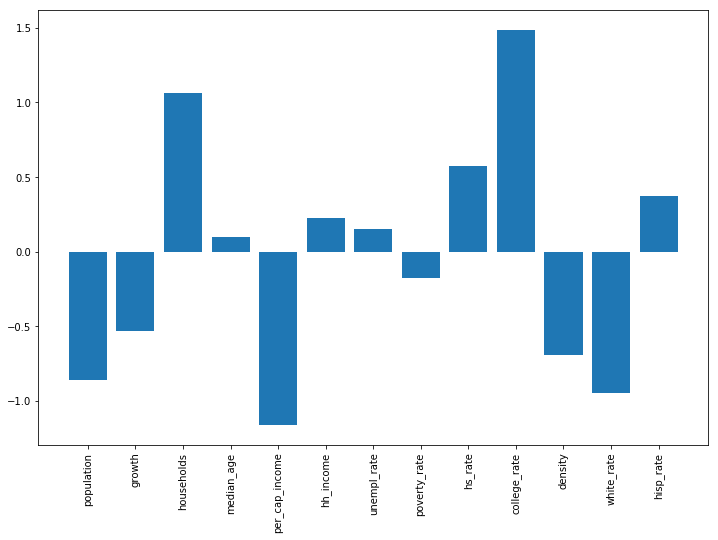

In [56]:
plt.bar(df.columns[0:-1], logreg_wgt.coef_[0])
plt.xticks(rotation=90);

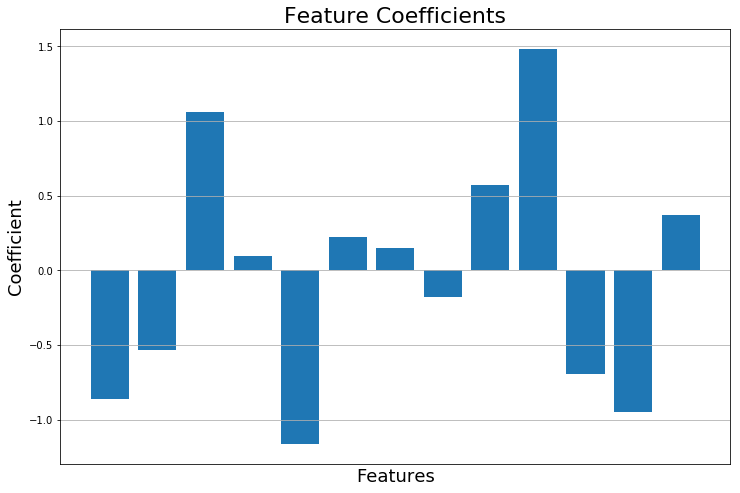

In [57]:
plt.bar(df.columns[0:-1], logreg_wgt.coef_[0])
#plt.xticks(rotation=90)
plt.xticks([])
plt.xlabel('Features', fontsize=18)
plt.ylabel('Coefficient', fontsize=18)
plt.title('Feature Coefficients', fontsize=22)
plt.grid()
# plt.savefig("presentation/feat.png")

In [58]:
log_feat = logreg_grid.coef_

In [59]:
log_feat_order = np.argsort(np.abs(log_feat.flat))[::-1]
betas = list(zip(X.columns[log_feat_order],log_feat.flat[log_feat_order]))

In [60]:
betas[0][0]

'college_rate'

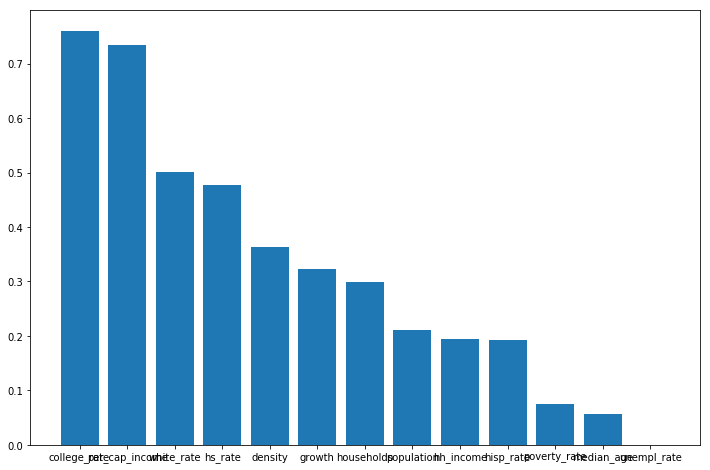

In [61]:
plt.bar(df.columns[0:-1][log_feat_order], abs(logreg_grid.coef_[0][log_feat_order]));

## Random Forest

### Initial Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_mod, y_train_mod)
y_pred = random_forest.predict(X_test_mod)

In [64]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



In [65]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[874,   2],
       [ 48,   0]])

In [66]:
y_scores = cross_val_predict(random_forest, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.0018561484918793504

### Grid Search

In [67]:
# try on best model
param_grid = {'n_estimators': range(20, 40), 'max_features': np.linspace(1, 40, 1)}
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring="recall")

In [68]:
best_model = grid_search.fit(X_train_mod, y_train_mod)

In [69]:
grid_search.best_params_

{'max_features': 1.0, 'n_estimators': 21}

In [70]:
random_forest_grid = RandomForestClassifier(max_features=1, n_estimators=25)
random_forest_grid.fit(X_train_mod, y_train_mod)
y_pred = random_forest_grid.predict(X_test_mod)

In [71]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Precision/Recall

In [72]:
y_prob_random_forest = random_forest.predict_proba(X_test_mod)[:, 1]

In [73]:
random_forest_p, random_forest_r, random_forest_t = precision_recall_curve(y_test_mod, y_prob_random_forest)

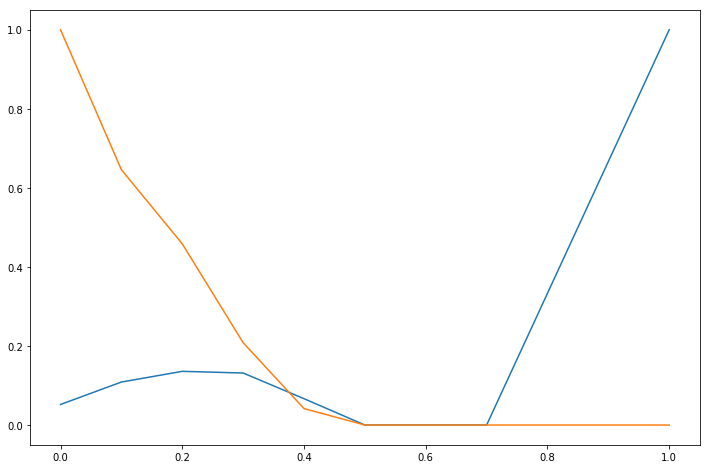

In [74]:
plt.plot(np.append(random_forest_t, 1), random_forest_p)
plt.plot(np.append(random_forest_t, 1), random_forest_r);

### Threshold Model

In [75]:
y_pred_proba = random_forest.predict_proba(X_test_mod)

In [76]:
y_pred = y_pred_proba >= 0.1

In [77]:
metrics.confusion_matrix(y_test_mod, y_pred[:, 1])

array([[622, 254],
       [ 17,  31]])

In [78]:
print(metrics.classification_report(y_test_mod, y_pred[:, 1]))

             precision    recall  f1-score   support

          0       0.97      0.71      0.82       876
          1       0.11      0.65      0.19        48

avg / total       0.93      0.71      0.79       924



### Weighted Model

In [79]:
random_forest = RandomForestClassifier(class_weight="balanced")
random_forest.fit(X_train_mod, y_train_mod)
y_pred = random_forest.predict(X_test_mod)

In [80]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



### SMOTE

In [81]:
random_forest_smote = RandomForestClassifier()
random_forest_smote.fit(X_train_smote, y_train_smote)
y_pred = random_forest_smote.predict(X_test_smote)

In [82]:
print(metrics.classification_report(y_test_smote, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.93      0.94       876
          1       0.12      0.17      0.14        48

avg / total       0.91      0.89      0.90       924



## SVM

### Initial Model

In [83]:
from sklearn import svm

In [84]:
rbf_svm = svm.SVC(kernel='rbf', probability=True)
rbf_svm.fit(X_train_mod, y_train_mod)
y_pred = rbf_svm.predict(X_test_mod)

In [85]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [86]:
metrics.confusion_matrix(y_test, y_pred)

array([[876,   0],
       [ 48,   0]])

In [87]:
y_scores = cross_val_predict(rbf_svm, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.0

### Precision/Recall

In [88]:
y_prob_svm = rbf_svm.predict_proba(X_test_mod)[:,1]

In [89]:
rbf_svm_p, rbf_svm_r, rbf_svm_t = precision_recall_curve(y_test_mod, y_prob_svm)

## KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [91]:
# search for an optimal value of K for KNN

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_mod, y_train_mod)
y_pred = knn.predict(X_test_mod)

In [92]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97       876
          1       0.00      0.00      0.00        48

avg / total       0.90      0.95      0.92       924



In [93]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[875,   1],
       [ 48,   0]])

In [94]:
y_scores = cross_val_predict(knn, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.0

### Precision/Recall

In [95]:
y_prob_knn = knn.predict_proba(X_test_mod)[:,1]

In [96]:
knn_p, knn_r, knn_t = precision_recall_curve(y_test_mod, y_prob_knn)

## Gaussian-Bayes

### Initial Model

In [97]:
from sklearn import naive_bayes, metrics

In [98]:
gb = naive_bayes.GaussianNB()
gb.fit(X_train_mod, y_train_mod)
y_pred = gb.predict(X_test_mod)

In [99]:
print(metrics.classification_report(y_test_mod, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       876
          1       0.11      0.19      0.14        48

avg / total       0.91      0.88      0.89       924



In [100]:
metrics.confusion_matrix(y_test_mod, y_pred)

array([[801,  75],
       [ 39,   9]])

In [101]:
y_scores = cross_val_predict(gb, X_train_mod, y_train_mod, cv=10)
np.mean(y_scores)

0.09791183294663573

### Precision/Recall

In [102]:
y_prob_gb = gb.predict_proba(X_test_mod)[:, 1]

In [103]:
gb_p, gb_r, gb_t = precision_recall_curve(y_test_mod, y_prob_gb)

## Precision-Recall Plot

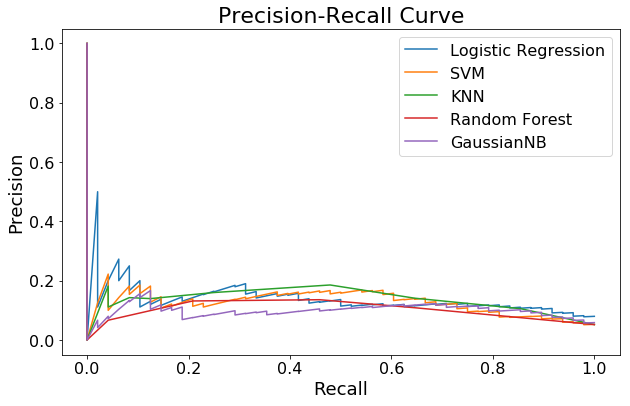

In [104]:
# plot P-R for all models

fig, ax = plt.subplots(figsize=(10, 6))

# Logisitic Regression
ax.plot(logreg_r, logreg_p, label='Logistic Regression')
# SVM
ax.plot(rbf_svm_r, rbf_svm_p, label='SVM')
#ax.step(rbf_svm_r, rbf_svm_p, color='b', alpha=0.2, where='post')
#ax.fill_between(rbf_svm_r, rbf_svm_p, step='post', alpha=0.2, color='b')
# KNN
ax.plot(knn_r, knn_p, label='KNN')
# Random Forest
ax.plot(random_forest_r, random_forest_p, label='Random Forest')
# Gaussian-Bayes
ax.plot(gb_r, gb_p, label='GaussianNB')

# ax.set_xlim(0, 1.01)
# ax.set_ylim(0, 1)
ax.set_title('Precision-Recall Curve', fontsize=22)
ax.set_ylabel('Precision', fontsize=18)
ax.set_xlabel('Recall', fontsize=18)
ax.legend(loc='upper right', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

plt.show()
# fig.savefig("presentation/prcurve.png")

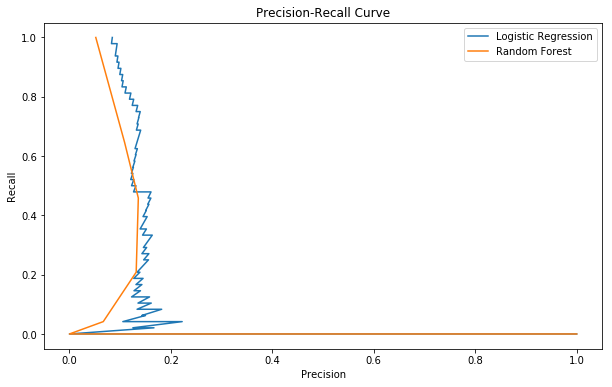

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))

# Logisitic Regression
ax.plot(logreg_wgt_p, logreg_wgt_r, label='Logistic Regression')
# SVM
# ax.plot(rbf_svm_p, rbf_svm_r, label='SVM')
#ax.step(rbf_svm_r, rbf_svm_p, color='b', alpha=0.2, where='post')
#ax.fill_between(rbf_svm_r, rbf_svm_p, step='post', alpha=0.2, color='b')
# KNN
# ax.plot(knn_p, knn_r, label='KNN')
# Random Forest
ax.plot(random_forest_p, random_forest_r, label='Random Forest')
# Gaussian-Bayes
# ax.plot(gb_p, gb_r, label='GaussianNB')

# ax.set_xlim(0, 1.01)
# ax.set_ylim(0, 1)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Recall')
ax.set_xlabel('Precision')
ax.legend(loc='upper right')

plt.show()